In [19]:
# Basic Module
import numpy as np
import pandas as pd

# Graphic Module
import matplotlib.pyplot as plt
import seaborn as sns

# ML/DL Module
from sklearn import svm, metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# .. Module

# warning message ignore
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('./result_data/labeling_data.csv', header=0, index_col=0, encoding='utf-8')

In [3]:
data.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Location ID,...,Streaming Movies_label,Streaming Music_label,Unlimited Data_label,Contract_label,Paperless Billing_label,Payment Method_label,Customer Status_label,Churn Label_label,Churn Category_label,Churn Reason_label
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,OXCZEW7397,...,1,0,0,0,1,0,0,1,1,5
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,FCCECI8494,...,0,0,1,0,1,1,0,1,1,3
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,HEHUQY7254,...,1,1,1,0,1,0,0,1,1,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,WIUHRF2613,...,1,0,1,0,1,0,0,1,2,11
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,CFEZBF4415,...,0,0,1,0,1,0,0,1,4,8


## Pre-check

### 선형/비선형 분리 확인

In [4]:
x_feature = ['Contract_label', 'Internet Type_label', 'Offer_label', 'Dependents_label', 'Married_label', 
'Referred a Friend_label', 'Online Security_label', 'Premium Tech Support_label', 'Online Backup_label', 
'Device Protection Plan_label', 'Senior Citizen_label', 'Under 30_label', 'Satisfaction Score', 
'Tenure in Months', 'Total Revenue', 'Avg Monthly GB Download']
y_feature = ['Churn Label_label']

x_data = data[x_feature]
y_data = data[y_feature]

In [15]:
# 선형 분리 교차 검증 평균, 적합성 확인 : 25min 소요
svm_clf = svm.SVC(kernel= 'linear')

scores = cross_val_score(svm_clf, x_data, y_data, cv=5)
print("cross_validation AVG :", scores.mean())
pd.DataFrame(cross_validate(svm_clf, x_data, y_data, cv=5))

cross_validation AVG : 0.9517249096715916


,fit_time,score_time,test_score
0,256.434170,0.023510,0.960256
1,97.169983,0.023006,0.943932
2,101.587117,0.023004,0.952449
3,139.299200,0.025003,0.953835
4,150.633709,0.022005,0.948153


In [16]:
# 비선형 분리 교차 검증 평균, 적합성 확인
svm_clf = svm.SVC(kernel= 'rbf')

scores = cross_val_score(svm_clf, x_data, y_data, cv=5)
print("cross_validation AVG :", scores.mean())
pd.DataFrame(cross_validate(svm_clf, x_data, y_data, cv=5))

cross_validation AVG : 0.7346301575908123


,fit_time,score_time,test_score
0,1.081256,0.468612,0.734564
1,1.092609,0.450186,0.734564
2,1.087309,0.495673,0.734564
3,0.981608,0.456432,0.734375
4,1.020747,0.456311,0.735085


## SVM

### Numeric Scaling

In [5]:
numeric_data = x_data.iloc[:,-4:]
scaler = StandardScaler()
scaler.fit(numeric_data)
numeric_data_scaled = scaler.transform(numeric_data)

x_data_cp = x_data.copy()
x_data_cp.iloc[:,-4:] = numeric_data_scaled

In [18]:
x_data_cp.head()

,Contract_label,Internet Type_label,Offer_label,Dependents_label,Married_label,Referred a Friend_label,Online Security_label,Premium Tech Support_label,Online Backup_label,Device Protection Plan_label,Senior Citizen_label,Under 30_label,Satisfaction Score,Tenure in Months,Total Revenue,Avg Monthly GB Download
0,0,1,0,0,0,0,0,0,0,1,1,0,-0.203836,-1.278988,-1.038299,-0.612975
1,0,2,5,1,1,1,0,0,1,0,1,0,-0.203836,-0.993743,-0.701668,-0.172176
2,0,2,4,1,0,0,0,0,0,0,1,0,-1.036080,-0.586250,-0.392146,1.542040
3,0,2,3,1,1,1,0,0,1,1,1,0,-1.036080,-0.301005,-0.013720,-0.417064
4,0,2,3,1,1,1,0,0,0,0,1,0,-1.036080,0.187986,0.023728,-0.319109


### Train/Test set isolation

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data_cp, y_data, test_size=0.25, random_state=100)

### Learning

In [27]:
model = svm.SVC(kernel='linear', C=1, probability=True)
model.fit(x_train, y_train)

SVC(C=1, kernel='linear', probability=True)

### Accuracy test

In [8]:
predict_result = model.predict(x_test)
accuracy_score(y_test, predict_result)

0.9426462237365133

In [21]:
confusion_matrix(y_test, predict_result)

array([[1276,   13],
       [  88,  384]], dtype=int64)

In [36]:
# test_data = [[0],[1],[0],[0],[0],[0],[0],[0],[0],[1],[1],[0],[-0.203836],[-1.278988],[-1.038299],[-0.612975]]
# test_data = [0,1,0,0,0,0,0,0,0,1,1,0,-0.203836,-1.278988,-1.038299,-0.612975]
test_data = [[0,1,0,0,0,0,0,0,0,1,1,0,-0.203836,-1.278988,-1.038299,-0.612975]]
model.predict_proba(test_data)


array([[0.18440218, 0.81559782]])

### Visualize

In [9]:
from sklearn.decomposition import PCA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


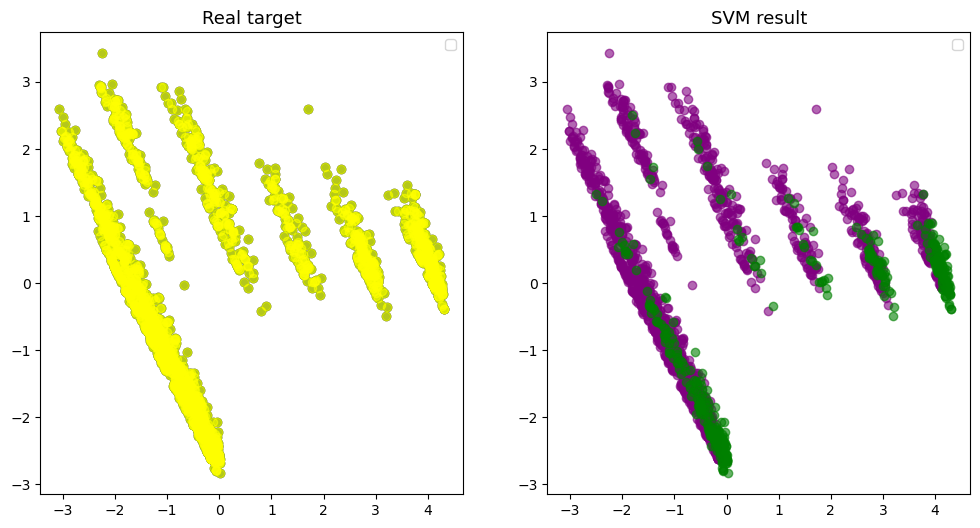

In [14]:
pca = PCA(n_components=2)

x_test_pca = pca.fit_transform(x_test)
y_result = y_test.reset_index(drop=True)

index_0 = y_result[y_result == 0].index
index_1 = y_result[y_result == 1].index
index_2 = y_result[y_result == 2].index

y_pred_Series = pd.Series(predict_result)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index
index_2_p = y_pred_Series[y_pred_Series == 2].index

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(x_test_pca[index_0, 0], x_test_pca[index_0, 1], color = 'purple', alpha = 0.6)
plt.scatter(x_test_pca[index_1, 0], x_test_pca[index_1, 1], color = 'green', alpha = 0.6)
plt.scatter(x_test_pca[index_2, 0], x_test_pca[index_2, 1], color = 'yellow', alpha = 0.6)
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(x_test_pca[index_0_p, 0], x_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6)
plt.scatter(x_test_pca[index_1_p, 0], x_test_pca[index_1_p, 1], color = 'green', alpha = 0.6)
plt.scatter(x_test_pca[index_2_p, 0], x_test_pca[index_2_p, 1], color = 'yellow', alpha = 0.6)
plt.title('SVM result', size = 13)
plt.legend()
plt.show()